<a href="https://colab.research.google.com/github/Rohit-Nikam/Machine_Learning-CAP-5610-/blob/master/program4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras 
from keras.datasets import mnist
import matplotlib.pyplot as plt
learning_rate = 0.05
epochs = 50
batch_size = 500

Using TensorFlow backend.


In [2]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
print('The shape of X_train :',X_train.shape)
print('The shape of y_train :',y_train.shape)
print('The shape of X_test :',X_test.shape)
print('The shape of y_test :',y_test.shape)

The shape of X_train : (60000, 28, 28)
The shape of y_train : (60000,)
The shape of X_test : (10000, 28, 28)
The shape of y_test : (10000,)


In [0]:
## Reshaping the data i.e flatening it
X_train = (X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = (X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the data
X_train /= 255
X_test /= 255

In [5]:
print('The shape of X_train :',X_train.shape)
print('The shape of X_test :',X_test.shape)

The shape of X_train : (60000, 784)
The shape of X_test : (10000, 784)


In [0]:
## As our target is a single of single dimensiom. We convert it to a distinct class labels.
## here as we have 10 numbers we make a class of 10 distinct numbers using one-hot encoder.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
print('The shape of y_train :',y_train.shape)
print('The shape of y_test :',y_test.shape)


The shape of y_train : (60000, 10)
The shape of y_test : (10000, 10)


In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))
sgd = keras.optimizers.SGD(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model_fit = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test, y_test))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 52us/step - loss: 1.1861 - acc: 0.7168 - val_loss: 0.7354 - val_acc: 0.8402
Epoch 2/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.6539 - acc: 0.8475 - val_loss: 0.5599 - val_acc: 0.8651
Epoch 3/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.5435 - acc: 0.8648 - val_loss: 0.4904 - val_acc: 0.8762
Epoch 4/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.4907 - acc: 0.8737 - val_loss: 0.4509 - val_acc: 0.8829
Epoch 5/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.4584 - acc: 0.8796 - val_loss: 0.4250 - val_acc: 0.8877
Epoch 6/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.4360 - acc: 0.8841 - val_loss: 0.4066 - val_acc: 0.8915
Epoch 7/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.4193

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy of the given model is :',score[1])

Test Accuracy of the given model is : 0.9187


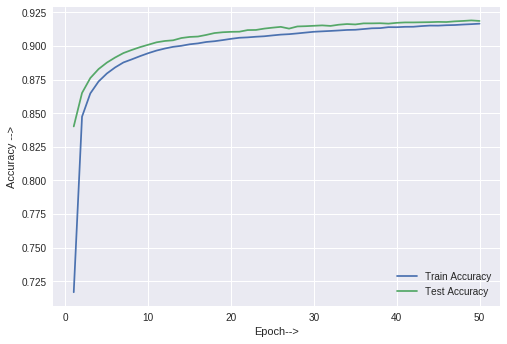

In [11]:
accuracy_plot = plt.plot(range(1,epochs+1),model_fit.history['acc'],range(1,epochs+1),model_fit.history['val_acc'])
plt.xlabel('Epoch-->')
plt.ylabel('Accuracy -->')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(accuracy_plot)